In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 100

In [23]:
COLUMNS = ['load_image', 'make_interpreter', 'set_input', 'invoke_interpreter', 'get_output']
path = '../logs/api_timing_v2.csv'
df = pd.read_csv(path, names=COLUMNS, header=None)

In [24]:
COLUMNS.append('total')

In [25]:
df['total'] = df.sum(axis=1)

In [26]:
df.head()

,load_image,make_interpreter,set_input,invoke_interpreter,get_output,total
0,21.287520,2798.166089,19.076045,46.787696,6.230875,2891.548225
1,0.239405,0.034221,8.984381,17.150011,3.372832,29.780850
2,0.238349,0.032055,7.545508,16.935477,3.922326,28.673715
3,0.247942,0.032018,7.584377,16.817237,4.120250,28.801824
4,0.243053,0.032351,7.763690,16.859181,3.746939,28.645214


In [27]:
df.drop(0, axis=0, inplace=True)
df.head()

,load_image,make_interpreter,set_input,invoke_interpreter,get_output,total
1,0.239405,0.034221,8.984381,17.150011,3.372832,29.780850
2,0.238349,0.032055,7.545508,16.935477,3.922326,28.673715
3,0.247942,0.032018,7.584377,16.817237,4.120250,28.801824
4,0.243053,0.032351,7.763690,16.859181,3.746939,28.645214
5,0.246367,0.032444,7.459027,16.795181,6.036802,30.569821


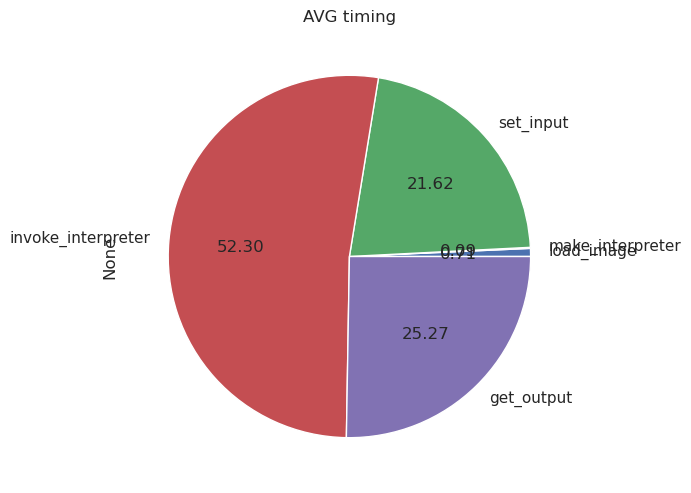

In [29]:
plt.figure()
df[COLUMNS[:-1]].mean(axis=0).plot(kind='pie', title='AVG timing', 
                     figsize=(6, 6), autopct="%.2f")

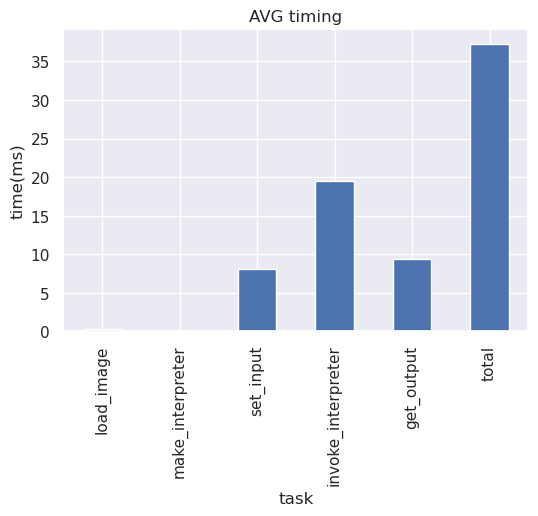

In [30]:
df.mean(axis=0).plot(kind='bar', title='AVG timing', 
                      ylabel='time(ms)', xlabel='task')

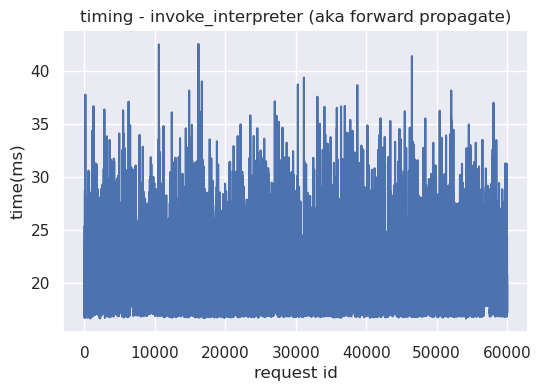

In [31]:
df['invoke_interpreter'].plot(title='timing - invoke_interpreter (aka forward propagate)', 
                      ylabel='time(ms)', xlabel='request id')

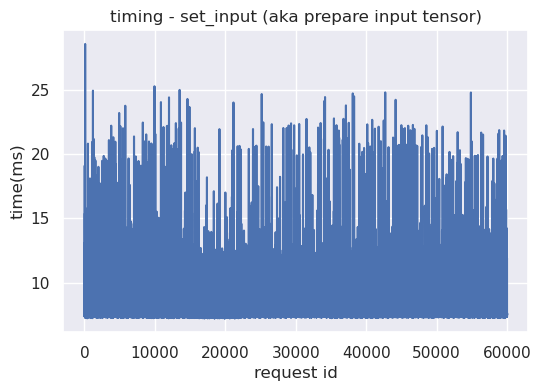

In [116]:
df['set_input'].plot(title='timing - set_input (aka prepare input tensor)',
                      ylabel='time(ms)', xlabel='request id')

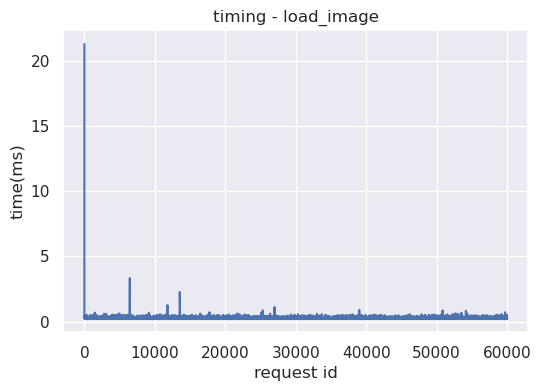

In [117]:
df['load_image'].plot(title='timing - load_image',
                      ylabel='time(ms)', xlabel='request id')

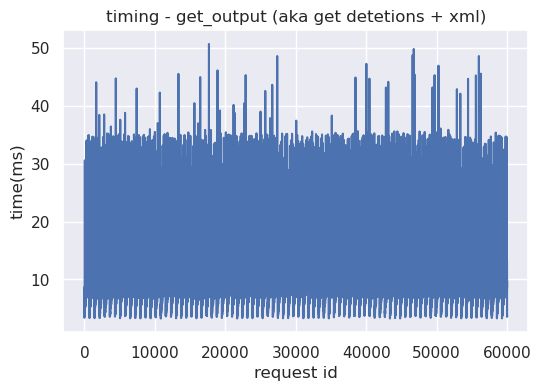

In [118]:
plt.figure();
df['get_output'].plot(title='timing - get_output (aka get detetions + xml)', 
                      ylabel='time(ms)', xlabel='request id')

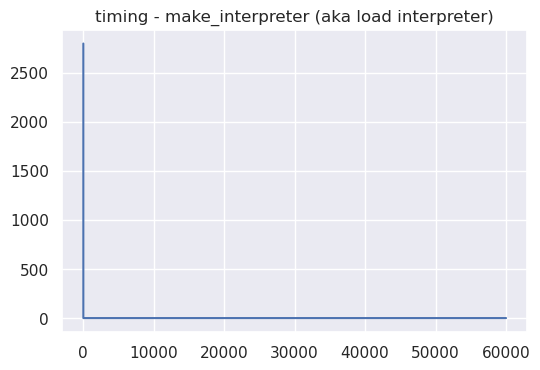

In [119]:
df['make_interpreter'].plot(title='timing - make_interpreter (aka load interpreter)')

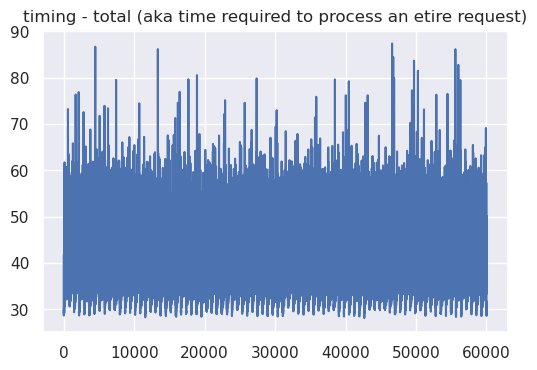

In [66]:
df = pd.read_csv('log/api_timing_v2.csv')
df['total'] = df.sum(axis=1)
df = df.drop([0])
df['total'].plot(title='timing - total (aka time required to process an etire request)')